
# Car Sales Forcasting using SARIMAX

## Data manipulation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('monthly-car-sales.csv')

In [30]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [31]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [32]:
# Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [33]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [34]:
df.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [35]:
df.set_index('Month',inplace=True)

In [36]:
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [37]:
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


## Visualize the Data

<Axes: xlabel='Month'>

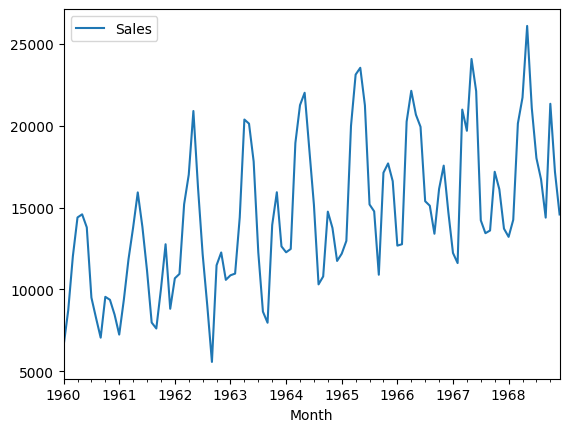

In [38]:
df.plot()

### Testing For Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [40]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.223812766175284
p-value : 0.6632691049832868
#Lags Used : 12
Number of Observations Used : 95
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [41]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [42]:
df.head(14)

,Sales,Seasonal First Difference
Month,,
1960-01-01,6550,NaN
1960-02-01,8728,NaN
1960-03-01,12026,NaN
1960-04-01,14395,NaN
1960-05-01,14587,NaN
1960-06-01,13791,NaN
1960-07-01,9498,NaN
1960-08-01,8251,NaN
1960-09-01,7049,NaN


In [43]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.644396602406015
p-value : 0.004966833586579731
#Lags Used : 11
Number of Observations Used : 84
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

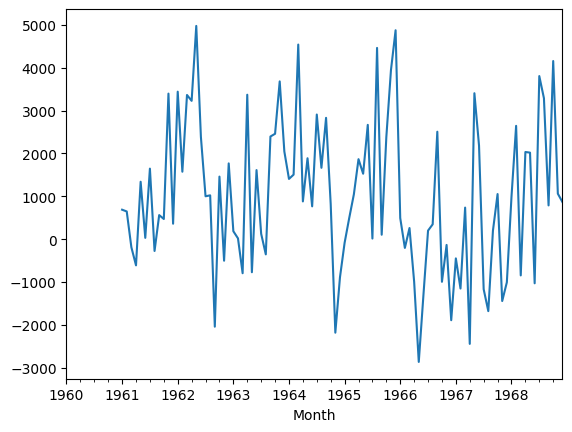

In [44]:
df['Seasonal First Difference'].plot()

## Plot the ACF and PACF

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

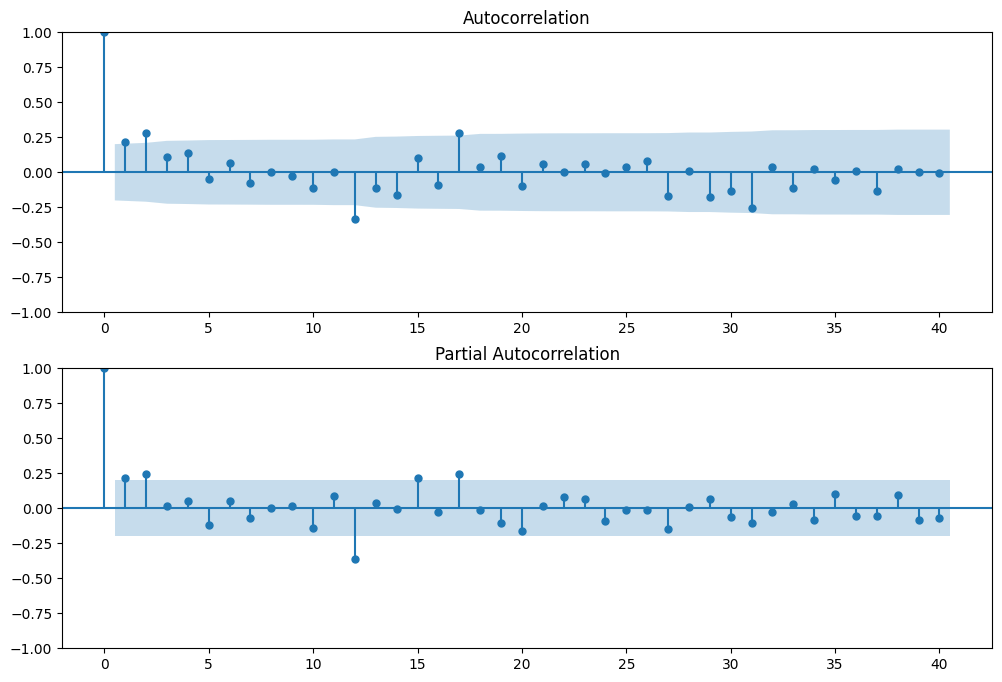

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


## Seasonal ARIMA

In [47]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ANISH\NisAnaconda\envs\hopeai_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ANISH\NisAnaconda\envs\hopeai_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
start, end = 90,107
df['forecast']=results.predict(start=start,end=end,dynamic=True)

In [49]:
## Performance Evaluation

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual_sales = df['Sales'][start:end] 
forecasted_sales = df['forecast'][start:end]

# RMSE
rmse = np.sqrt(mse)
# R-Squared
r2 = r2_score(actual_sales, forecasted_sales)

print(f"R-Squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")



R-Squared: 0.8007618371218729
Root Mean Squared Error: 1617.9526893318555


## Forecast Plot 

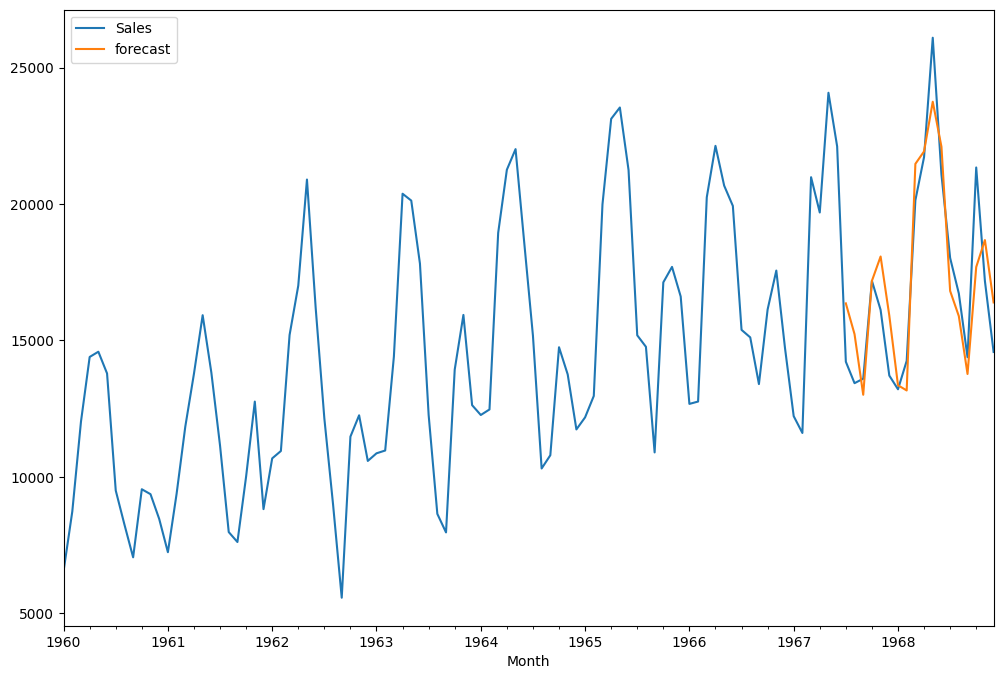

In [51]:
df['forecast']=results.predict(start=90,end=107,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [52]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [53]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [54]:
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1970-07-01,NaN,NaN,NaN
1970-08-01,NaN,NaN,NaN
1970-09-01,NaN,NaN,NaN
1970-10-01,NaN,NaN,NaN
1970-11-01,NaN,NaN,NaN


In [55]:
future_df=pd.concat([df,future_datest_df])

C:\Users\ANISH\AppData\Local\Temp\ipykernel_33084\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


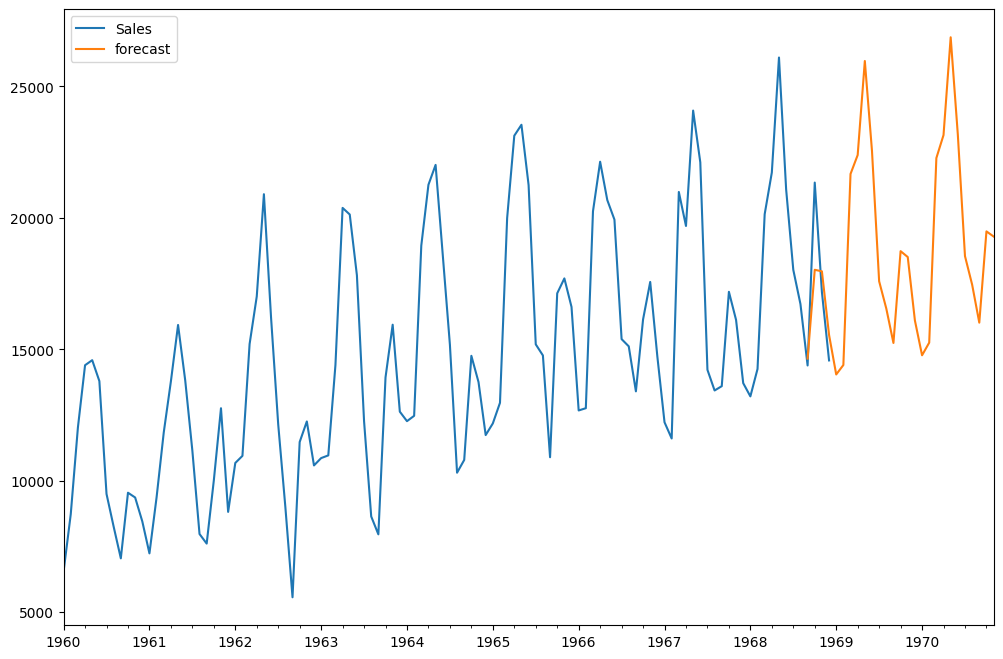

In [56]:
future_df['forecast'] = results.predict(start = 104, end = 170, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 
plt.show()